<a href="https://colab.research.google.com/github/raj-vijay/da/blob/master/03_Least_squares_Parameter_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Least-squares parameter estimation

<p align = 'justify'>The goal is to find the position of a mobile device given the distance measurements between the device and the surrounding cell towers. This technology is for instance being used by emergency services to pinpoint the exact location of a caller. In a more general formulation with slightly different constraints it is also the underlying approach for satellite-based positioning systems, such as GPS.</p>

![alt text](https://raw.githubusercontent.com/raj-vijay/da/master/images/RadioTower.png)

**Task 1**

Let the locations of the three visible cell towers be given by: 

$$l1 = \begin{pmatrix} 5 \\ 25 \end{pmatrix}$$

$$l2 = \begin{pmatrix} 32 \\ 22 \end{pmatrix}$$

$$l3 = \begin{pmatrix} 29 \\ 5 \end{pmatrix}$$

<p align = 'justify'>As a first guess, we can assume that the mobile device is somewhere in the middle between the three. Write a Python program that calculates the initial guess for the position 𝑥0 to be the average between the three cell tower positions.</p>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
towers = np.array([[5,25],[32,22],[29,5]])

**Task 2**

The linearized constraint is defined as 𝐴𝑥 + 𝐵𝑦 = 𝑐 for this problem with the coefficient matrices:

$$𝐴 = 2 \begin{pmatrix} 𝑥_0^𝑇−𝑙_1^𝑇 \\ 𝑥_0^𝑇−𝑙_2^𝑇 \\ 𝑥_0^𝑇−𝑙_3^𝑇 \end{pmatrix}$$

$$
B=-I_3
$$

$$c = \begin{pmatrix} 𝑥_0^𝑇𝑥_0−𝑙_1^𝑇𝑙_1 \\ 𝑥_0^𝑇𝑥_0−𝑙_2^𝑇𝑙_2 \\ 𝑥_0^𝑇𝑥_0−𝑙_3^𝑇𝑙_3 \end{pmatrix}$$


Write a Python program that calculates these matrices.

In [ ]:
def estimate_position(towers, distances, initial_position):
    l = towers
    y_ = distances**2
    x0 = initial_position
    
    A = 2*(x0-l)
    B = -np.eye(len(y_)) 
    c = sum(x0*x0)-np.sum(l*l,axis=1)             
    
        
    M11 = np.zeros((2,2))
    M12 = np.zeros((2,len(y_)))
    M13 = A.transpose()
    M1 = np.append(np.append(M11,M12,axis=1),M13,axis=1)
    b1 = np.zeros((2,1))
    
    M21 = np.zeros((len(y_),2))
    M22 = 2*np.eye(len(y_))
    M23 = B.transpose()
    M2 = np.append(np.append(M21,M22,axis=1),M23,axis=1)
    b2 = 2*y_
    
    M31 = A
    M32 = B
    M33 = np.zeros((len(y_),len(y_)))
    M3 = np.append(np.append(M31,M32,axis=1),M33,axis=1)    
    b3 = c
    
    M = np.append(np.append(M1, M2, axis=0), M3, axis=0)    
    b = np.append(np.append(b1,b2),b3)

    est = np.linalg.solve(M,b)
    
    x = est[0:2]

    return x

**Task 3**

Now we consider the measured distances between the cell towers and the mobile device:

$$\bar{d}_1=17$$
$$\bar{d}_2=13$$
$$\bar{d}_3=15$$

The linearized constraints were based on squared distances ($\bar{y}_i=\bar{d}_i^2$) and we determined that the minimum of $(y - \bar{y})^2$ under these constraints could be obtained by solving the linear equation system.

$$𝜆^𝑇𝐴=0$$

$$2(𝑦−𝑦̅)+𝜆^𝑇𝐵=0$$

$$𝐴𝑥+𝐵𝑦−𝑐=0$$

Write a Python program that builds this 3 sets of linear equations:

(1) Create the 2x8-matrix $𝑀_1=\begin{bmatrix} 0_{2×2} & 0_{2×3} & 𝐴^𝑇\end{bmatrix}$ and the vector $𝑏_1 = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$ corresponding to the first linear constraint

(2) Create the 3x8-matrix $𝑀_1 = \begin{bmatrix} 0_{3×2} & 2𝐼_3 & 𝐵^𝑇\end{bmatrix}$ and the vector $𝑏_2 = 2\bar{y}$ corresponding to the second linear constraint

(3) Create the 3x8-matrix $𝑀_1 = \begin{bmatrix} 𝐴 & 𝐵 & 0_{3×3}\end{bmatrix}$ and the vector $𝑏_3 = 𝑐$ corresponding to the third linear constraint

**Task 4**

<p align = 'justify'>Having constructed all the elements, we now want to solve the equation system to obtain the position of the mobile device from the distance measurements. To do this we need to stack the equation systems derived in the previous task and obtain a single 8x8 linear equation system as follows:</p>


$$\begin{bmatrix} M_1 \\ M_2 \\ M_3 \end{bmatrix} \begin{pmatrix}x \\ y \\ z\end{pmatrix} = \begin{pmatrix}b_1 \\ b_2 \\ b_3\end{pmatrix}$$

Write a Python program that solves this linear equation system and computes the 8 vector 

$$ s = \begin{pmatrix}𝑥 \\ 𝑦 \\ 𝜆 \end{pmatrix}$$


<p align = 'justify'>Finally, extract the position of the mobile device 𝑥 from the solution vector. If you followed all the steps above correctly you should obtain the actual position to be</p> 

$$ 𝑥=\begin{pmatrix} 20 \\ 17\end{pmatrix}$$


(Hint: use https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html to solve the linear equation system)

In [ ]:
true_position = np.array([20,17])
sigma = 1.0

In [ ]:
true_distances = np.sqrt(np.sum(((towers - true_position)**2),axis=1))
distances = true_distances + sigma*np.random.randn(len(true_distances))

In [ ]:
print(towers)
print(true_position)
print(true_distances)
#print(distances)

[[ 5 25]
 [32 22]
 [29  5]]
[20 17]
[17. 13. 15.]


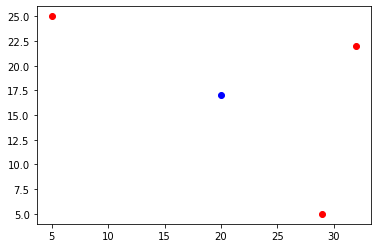

In [ ]:
plt.close('all')
plt.figure()
plt.scatter(towers[:,0], towers[:,1], color='r')
plt.scatter(true_position[0], true_position[1], color='b')

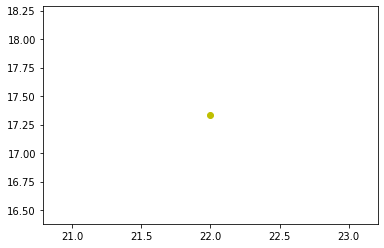

In [ ]:
initial_position = np.mean(towers,axis=0)    
plt.scatter(initial_position[0], initial_position[1], color='y')

4.9424055639816995
0.09473438389772659
0.0014413609700279506
2.3308368699789857e-05
3.8002703318578893e-07
6.2024280733519025e-09
1.0124295242712766e-10
1.6526273139720722e-12
2.6976520512088057e-14
4.4034875049096294e-16


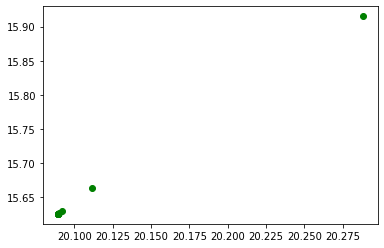

In [ ]:
position = initial_position
for i in range(10):
  x = estimate_position(towers, distances, position)
  plt.scatter(x[0], x[1], color='g')
  print(sum((x-position)**2))
  position = x

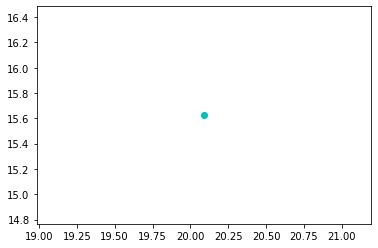

In [ ]:
plt.scatter(position[0], position[1], color='c')

In [ ]:
print(position)

[20.08952659 15.62542397]
